## MNIST dataset

MNIST 란 손글씨 숫자를 28 x 28 의 그레이스케일 픽셀과 숫자 레이블을 제공하는 데이터셋입니다.

6 만 개의 훈련용 데이터와 1 만 개 정도의 테스트 데이터를 제공합니다.

MNIST 관련 홈페이지에서 파일을 직접 다운받아서 디코딩한 후에 데이터를 사용할 수도 있지만, 머신러닝 모듈에서 기본 데이터 세트로 제공하기도 합니다.

텐서플로우에서도 간편하게 MNIST 데이터를 사용할 수 있는데, 다음과 같은 코드를 실행하면 관련 파일이 생기고 MNIST 데이터셋을 사용할 수 있게 됩니다.

덴서플로우에서 MNIST 데이터를 다루는 방법을 보려면 코드 내용을 살펴봅니다.
https://github.com/tensorflow/tensorflow/blob/r1.3/tensorflow/contrib/learn/python/learn/datasets/mnist.py


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('D:/Dev/Python-ML/data/mnist/', one_hot=True)

Extracting D:/Dev/Python-ML/data/mnist/train-images-idx3-ubyte.gz
Extracting D:/Dev/Python-ML/data/mnist/train-labels-idx1-ubyte.gz
Extracting D:/Dev/Python-ML/data/mnist/t10k-images-idx3-ubyte.gz
Extracting D:/Dev/Python-ML/data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

mnist 에 저장된 데이터는 훈련용과 테스트용 데이터가 들어가 있고 각각 train 과 test 매개변수를 통해서 데이터에 접근할 수 있습니다.

또한 각각의 분류마다 이미지의 픽셀 정보를 담은 데이터는 images 에 레이블 정보를 원핫 인코딩한 정보는 labels 에 들어 있습니다.

images 와 labels 정보는 numpy 의 ndarray 타입으로 이대로 편하게 행렬 계산을 할 수 있습니다.

In [5]:
type(mnist.train.images), type(mnist.train.labels)

(numpy.ndarray, numpy.ndarray)

이미지 데이터의 모야을 보면 훈련용 데이터가 5.5만개 테스트용 데이터가 1만개 들어있습니다.

784 라는 숫자는 28 의 제곱으로 2차원 픽셀 정보를 1차원으로 한 줄로 늘어트린 것 입니다.

이처럼 일반 신경망에서는 2차원 정보의 상호 연관성을 대부분 무시한채 입력 데이터를 가공하는데, 컨벌루전 신경망(CNN) 에서는 입력 데이터로 2차원 평면을 그대로 사용합니다.   당연히 CNN 의 분류 성능이 높습니다.

In [6]:
print('size of traing data set : ', mnist.train.images.shape)
print('size of test data set : ', mnist.test.images.shape)

size of traing data set :  (55000, 784)
size of test data set :  (10000, 784)




MNIST 데이터셋이 커서 좋은 것 이지만 훈련 연습을 할 때는 큰 데이터 때문에 훈련 시간이 오래걸립니다.

그래서 훈련 데이터를 1만개로 줄여서 사용하겠습니다.



In [7]:
Y_train_labels = np.argmax(mnist.train.labels, axis=1)

In [8]:
from sklearn.model_selection import train_test_split

데이터를 랜덤하게 두 부분으로 나눌 때는 사이킷런의 train_test_split 함수를 사용하면 편합니다.

나누는 비율을 1/5.5 로 주어서 1만개를 train 용 데이터에 할당하겠습니다.

In [9]:
X_train, _, Y_train, _ = train_test_split(mnist.train.images, mnist.train.labels, train_size=1/5.5,
                                         random_state=137, stratify=Y_train_labels)

train_test_split 함수에서 train_size 를 1/5.5 로 주어서 X_train 의 크기는 1만개 정도가 나올 것으로 예상합니다. stratify 옵션을 Y 레이블롤 설정하면 나원래의 Y 레이블에 있는 분류 비율이 양 쪽의 나눠진 데이터셋에서도 유지됩니다.

테스트용 데이터는 minst 에 원래 테스트용으로 준비해둔 1만개의 샘플을 사용합니다.

In [10]:
X_test, Y_test = mnist.test.images, mnist.test.labels

In [11]:
print('새로 만든 훈련 데이터셋 크기 : ',len(X_train))

새로 만든 훈련 데이터셋 크기 :  10000


In [12]:
print('새로 만든 훈련 데이터의 레이블 분포 : ', np.bincount(np.argmax(Y_train, axis=1)))

새로 만든 훈련 데이터의 레이블 분포 :  [ 990 1123  994 1025  965  907  985 1039  980  992]


각 레이블(숫자)별로 적당하게 나눠졌습니다. 

방금 만든 작은 크기의 MNIST 데이터는 앞으로 자주 사용하므로 pickle 을 사용해서 바이너리 파일로 저장해두겠습니다.    6 MB 정도의 파일이 생깁니다. 

앞으로 작은 MNIST 데이터가 필요할 때는 이 피클 파일을 불러와서 사용하겠습니다.

In [13]:
mnist_small = (X_train, Y_train, mnist.test.images, mnist.test.labels)

In [14]:
import pickle
f = open(r'D:/Dev/Python-ML/data/mnist/mnist_small.pickle', 'wb')
pickle.dump(mnist_small, f)

### 피클 파일로부터 MNIST 데이터 불러들이기

In [15]:
mnist_small = pickle.load(open(r'D:/Dev/Python-ML/data/mnist/mnist_small.pickle', 'rb'))

In [16]:
X_train, Y_train, X_test, Y_test = mnist_small

In [17]:
print(len(X_train), X_train.shape)
print(len(Y_train), Y_train.shape)

10000 (10000, 784)
10000 (10000, 10)


## 데이터 이미지로 보기

중간 정도에 위치해있는 8 개의 데이터를 이미지로 그려보겠습니다.

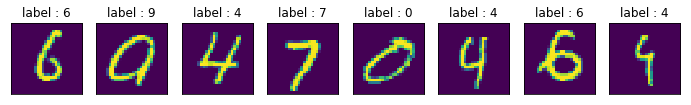

In [20]:
fig, axes = plt.subplots(1, 8, figsize=(12,2), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.ravel()):
    img = X_train[i+5000].reshape(28,28)
    label = np.argmax(Y_train[i+5000])
    ax.imshow(img)
    ax.set_title('label : {}'.format(label))
    
plt.show()

두 번쨰 데이터의 레이블이 9인데 사람의 눈으로로 0으로 보입니다.  

마지막의 데이터는 4인데 9로 보일 수도 있습니다.

가운데의 4도 9로 읽힐 수 있겠다는 생각이 듭니다.

이처럼 사람이 직접 분류해도 정확도가 100%가 나오지는 않을 것 같습니다.

깊은 신경망에서는 이 분류에서 99% 이상의 정확도로 분류할 수 있다는게 놀랍지 않습니까?

여기서의 정확도의 기준은 오직 레이블입니다. 글씨를 쓴 사람의 의도는 사람도 컴퓨터도 알 수 없습니다.

픽셀데 대한 데이터는 0에서 1 사이의 실수입니다. 1에 가까울 수록 진한 검은색을 나타내고 0이면 흰색입니다.

데이터의 내용을 확인해보겠습니다.

In [23]:
X_train[0, 350:400]

array([ 0.35686275,  0.94117653,  0.99607849,  0.86666673,  0.10588236,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.03921569,  0.72941178,
        0.99607849,  0.99215692,  0.49019611,  0.99215692,  0.99607849,
        0.85098046,  0.10980393,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)

y_train 데이터입니다.

In [26]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

8 번째 인덱스가 1이니 8을 의미합니다.   이미지 그래프를 그려서 확인해보겠습니다.

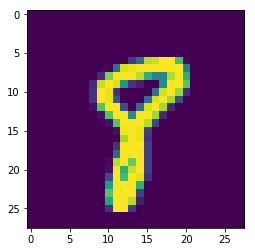

In [28]:
plt.imshow(X_train[0].reshape(28,28))
plt.show()

## 아주 간단한 분류기 모델로 예측해보기


데이터의 양이 그리 크지 않을 경웅에는 로지스틱 회귀는 서포트 벡터 머신(SVM) 으로 간단히게 해볼 수 있습니다.

사용하는 커널은 'rbf' 로 기본값입니다.   이런 회귀 모델에서 사용하는 Y 데이터는 one-hot encoding 한 값이 아니라 레이블값을 그대로 사용하기 떄문에 데이터를 가공해서 사용했습니다.

In [30]:
from sklearn.svm import SVC

원핫 인코딩 된 데이터를 레이블 데이터로 변경하는 방법은 아래와 같이 numpy 의 argmax 함수를 사용하고 축 인자로 1을 지정하면 됩니다.

원핫 인코딩에서는 레이블에 해당하는 인덱스의 원소가 1이고 나머지 인덱스의 원소는 0이기 때문에 최대값을 갖는 인덱스를 찾으면 레이블 정보로 변환됩니다.

In [33]:

Y_train_label = np.argmax(Y_train, axis=1)

svc = SVC(kernel='rbf')
%timeit svc.fit(X_train, Y_train_label)

1 loop, best of 3: 1min 30s per loop


모듈을 통한 회귀 또는 분류 머신러닝의 훈련과정은 위의 코드에서 보듯이 간단합니다.

복잡할 이유가 없고 한 줄 코딩인 이유는 사이킷런의 모듈 그리고 다른 모듈에서도 단순한 인터페이스를 따르고 있기 때문입니다.

머신러닝이 복잡하고 어렵다면 그것은 데이터를 분석하고 적당한 알고리즘을 선택해서 평가하는 일이지 훈련과정 자체는 간단합니다.

1만 개의 데이터를 SVM 으로 훈련시키는데 제 컴퓨터에서는 1분 30초가 걸렸습니다. 데이터를 줄이길 잘 했습니다.

In [65]:
Y_test_label = np.argmax(Y_test, axis=1)
print('테스트 세트 정확도 : ', svc.score(X_test, Y_test_label))

테스트 세트 정확도 :  0.9236


훈련시킨 모델로 테스트 샘플에 대한 정확도를 구해봤습니다.

파라마티 튜닝을 하지 않은 모델로도 92.6% 라는 괜찮은 정확도를 얻을 수 있습니다.

분류 클래스별로 정확도를 알려면 아래와 같이 사이킷런의 claasification_report 함수를 사용합니다.

In [29]:
from sklearn.metrics import classification_report
prediction = svc.predict(X_test)
print(classification_report(Y_test_label, prediction))

NameError: name 'svc' is not defined

다음 실습에선느 간단한 신경망을 사용해서 정확도를 조금 높여보겠습니다.